**Relatório**

Foram estudadas 3 classes
> Sendo: classe 0 (59), classe 1 (71), classe 2 (48) no total de 178 amostras, não foi específicado o nome das 3 classes, apenas se referindo como ['class_0' 'class_1' 'class_2'],

E como informação das características foram encontradas 13
> Sendo: Álcool, Ácido málico, Cinzas, Alcalinidade de cinzas (Elementos minerais do vinho), Magnésio, Total de fenóis, Flavonóides, Fenóis não flavanoides, Proantocianinas, Intensidade da cor, Tonalidade da cor, Nível OD280 / OD315 de vinhos diluídos, Níveis do aminoácido prolina.

In [1]:
import torch

class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Net, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size) #full connected
    self.relu = torch.nn.ReLU() #(0, infinito)
    self.fc2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid() #(0, 1)
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

In [2]:
from sklearn import datasets

wine = datasets.load_wine()
dados = wine.data
classes = wine.target

In [3]:
import numpy as np
# Classe 1
saida = np.where(classes==2, 1, classes)

entrada = torch.FloatTensor(dados) / 1000
saida = torch.FloatTensor(saida) 

from sklearn.utils import shuffle
entrada, saida = shuffle(entrada, saida)

In [4]:
entrada_treinamento = entrada[0:148, :]
saida_treinamento = saida[0:148]
entrada_testes = entrada[148:178, :]
saida_testes = saida[148:178]

#['class_0: 59', 'class_1: 71', 'class_2: 48'] - 178

In [5]:
input_size = entrada_treinamento.size()[1]
hidden_size = 13
modelo = Net(input_size, hidden_size)

In [6]:
epochs = 100000

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(modelo.parameters(), lr = 0.9, momentum = 0.3)

errors = []

for epoch in range(epochs):
  optimizer.zero_grad()
  # Forward pass
  y_pred = modelo(entrada_treinamento)
  # Compute Loss
  loss = criterion(y_pred.squeeze(), saida_treinamento)
  errors.append(loss.item())
  if epoch % 10000 == 0:
    print('Epoca {}: aprendizado: {}'.format(epoch, loss.item()))
  # Backward pass
  loss.backward()
  optimizer.step()

  y_pred = modelo(entrada_testes)

Epoca 0: aprendizado: 0.24015769362449646
Epoca 10000: aprendizado: 0.04531257599592209
Epoca 20000: aprendizado: 0.04266037791967392
Epoca 30000: aprendizado: 0.04008469358086586
Epoca 40000: aprendizado: 0.037536777555942535
Epoca 50000: aprendizado: 0.035364873707294464
Epoca 60000: aprendizado: 0.03347638621926308
Epoca 70000: aprendizado: 0.031788114458322525
Epoca 80000: aprendizado: 0.030247269198298454
Epoca 90000: aprendizado: 0.02881675399839878


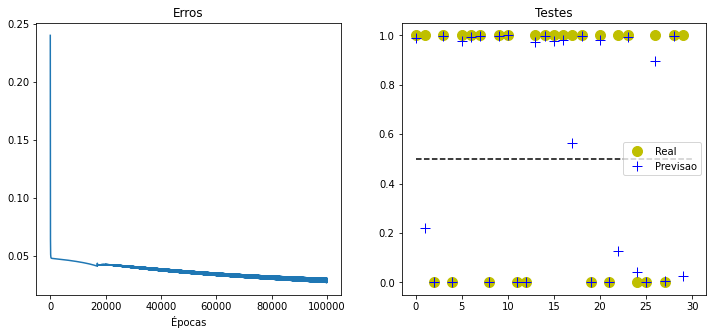

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Erros')
    plt.plot(errors, '-')
    plt.xlabel('Épocas')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Testes')
    a = plt.plot(saida_testes.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Previsao')
    plt.hlines(0.5, 0, 30, colors='k', linestyles='dashed')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)